In [0]:
!git clone https://github.com/Arshscitech/Self-Driving-Car

fatal: destination path 'Self-Driving-Car' already exists and is not an empty directory.


In [0]:
!ls Self-Driving-Car 

driving_log.csv  IMG


In [0]:
!pip3 install imgaug

In [0]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.models import Sequential
from keras.layers import Dense, Flatten, Convolution2D, MaxPooling2D, Dropout
from keras.optimizers import Adam
import cv2
import random 
import ntpath
import pandas as pd
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from imgaug import augmenters as iaa

In [0]:
data_dir = 'Self-Driving-Car'
columns = ['center', 'left', 'right','steering', 'throttle', 'reverse', 'speed']
data = pd.read_csv(os.path.join(data_dir, 'driving_log.csv'), names = columns)
pd.set_option('display.max_colwidth', -1)
data.head()

center  \
0  C:\Users\Arsh Ahmed\Desktop\Self Driving Cars\14. Self Driving Car (Behaviour Cloning)\Data\IMG\center_2019_05_13_18_25_47_377.jpg   
1  C:\Users\Arsh Ahmed\Desktop\Self Driving Cars\14. Self Driving Car (Behaviour Cloning)\Data\IMG\center_2019_05_13_18_25_47_479.jpg   
2  C:\Users\Arsh Ahmed\Desktop\Self Driving Cars\14. Self Driving Car (Behaviour Cloning)\Data\IMG\center_2019_05_13_18_25_47_581.jpg   
3  C:\Users\Arsh Ahmed\Desktop\Self Driving Cars\14. Self Driving Car (Behaviour Cloning)\Data\IMG\center_2019_05_13_18_25_47_684.jpg   
4  C:\Users\Arsh Ahmed\Desktop\Self Driving Cars\14. Self Driving Car (Behaviour Cloning)\Data\IMG\center_2019_05_13_18_25_47_783.jpg   

                                                                                                                                left  \
0   C:\Users\Arsh Ahmed\Desktop\Self Driving Cars\14. Self Driving Car (Behaviour Cloning)\Data\IMG\left_2019_05_13_18_25_47_377.jpg   
1   C:\Users\Arsh Ahmed\Desktop\Self Driving Cars\14. Self Driving Car (Behaviour Cloning)\Data\IMG\left_2019_05_13_18_25_47_479.jpg   
2   C:\Users\Arsh Ahmed\Desktop\Self Driving Cars\14. Self Driving Car (Behaviour Cloning)\Data\IMG\left_2019_05_13_18_25_47_581.jpg   
3   C:\Users\Arsh Ahmed\Desktop\Self Driving Cars\14. Self Driving Car (Behaviour Cloning)\Data\IMG\left_2019_05_13_18_25_47_684.jpg   
4   C:\Users\Arsh Ahmed\Desktop\Self Driving Cars\14. Self Driving Car (Behaviour Cloning)\Data\IMG\left_2019_05_13_18_25_47_783.jpg   

                                                                                                                                right  \
0   C:\Users\Arsh Ahmed\Desktop\Self Driving Cars\14. Self Driving Car (Behaviour Cloning)\Data\IMG\right_2019_05_13_18_25_47_377.jpg   
1   C:\Users\Arsh Ahmed\Desktop\Self Driving Cars\14. Self Driving Car (Behaviour Cloning)\Data\IMG\right_2019_05_13_18_25_47_479.jpg   
2   C:\Users\Arsh Ahmed\Desktop\Self Driving Cars\14. Self Driving Car (Behaviour Cloning)\Data\IMG\right_2019_05_13_18_25_47_581.jpg   
3   C:\Users\Arsh Ahmed\Desktop\Self Driving Cars\14. Self Driving Car (Behaviour Cloning)\Data\IMG\right_2019_05_13_18_25_47_684.jpg   
4   C:\Users\Arsh Ahmed\Desktop\Self Driving Cars\14. Self Driving Car (Behaviour Cloning)\Data\IMG\right_2019_05_13_18_25_47_783.jpg   

   steering  throttle  reverse     speed  
0  0.0       0.0       0        0.000078  
1  0.0       0.0       0        0.000079  
2  0.0       0.0       0        0.000079  
3  0.0       0.0       0        0.000079  
4  0.0       0.0       0        0.000078

In [0]:
def path_leaf(path): # get the end part of the path only 
  head, tail = ntpath.split(path)
  return tail
data['center'] = data['center'].apply(path_leaf)
data['left'] = data['left'].apply(path_leaf)
data['right'] = data['right'].apply(path_leaf)
data.head()

center                              left  \
0  center_2019_05_13_18_25_47_377.jpg  left_2019_05_13_18_25_47_377.jpg   
1  center_2019_05_13_18_25_47_479.jpg  left_2019_05_13_18_25_47_479.jpg   
2  center_2019_05_13_18_25_47_581.jpg  left_2019_05_13_18_25_47_581.jpg   
3  center_2019_05_13_18_25_47_684.jpg  left_2019_05_13_18_25_47_684.jpg   
4  center_2019_05_13_18_25_47_783.jpg  left_2019_05_13_18_25_47_783.jpg   

                               right  steering  throttle  reverse     speed  
0  right_2019_05_13_18_25_47_377.jpg  0.0       0.0       0        0.000078  
1  right_2019_05_13_18_25_47_479.jpg  0.0       0.0       0        0.000079  
2  right_2019_05_13_18_25_47_581.jpg  0.0       0.0       0        0.000079  
3  right_2019_05_13_18_25_47_684.jpg  0.0       0.0       0        0.000079  
4  right_2019_05_13_18_25_47_783.jpg  0.0       0.0       0        0.000078

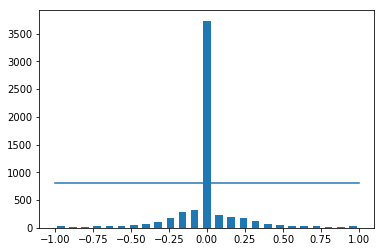

In [0]:
num_bins = 25
samples_per_bin = 800
hist, bins = np.histogram(data['steering'], num_bins)
center = (bins[:-1]+bins[1:])*0.5 # to center the bins to 0 while plotting 
plt.bar(center, hist, width=0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin))

Total data 5908
removed 2933
Remaining 2975


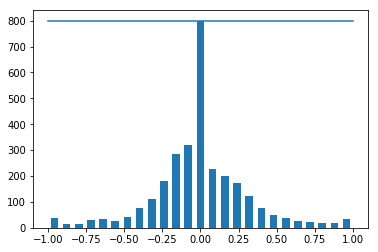

In [0]:
print("Total data", len(data))
remove_list = []
for j in range(num_bins):
  list_ = []
  for i in range(len(data['steering'])):
    if data['steering'][i]>=bins[j] and data['steering'][i]<=bins[j+1]:
      list_.append(i)
  list_ = shuffle(list_)
  list_ = list_[samples_per_bin:] # Remove excess data above the threshold
  remove_list.extend(list_)
print("removed", len(remove_list))
data.drop(data.index[remove_list], inplace = True)
print("Remaining", len(data))
hist, _ = np.histogram(data['steering'], num_bins)
plt.bar(center, hist, width=0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin))

In [0]:
def load_img_steering(datadir, df):
  image_path, steering = [], []
  for i in range(len(data)):
    indexed_data = data.iloc[i]
    center, left, right = indexed_data[0], indexed_data[1], indexed_data[2]
    image_path.append(os.path.join(datadir, center.strip()))
    steering.append(float(indexed_data[3]))
  image_path = np.asarray(image_path)
  steering = np.asarray(steering)
  return image_path, steering
image_paths, steering = load_img_steering(data_dir+'/IMG', data)

In [0]:
X_train, X_valid, y_train, y_valid = train_test_split(image_paths, steering, random_state = 16, test_size = 0.2)
print(len(X_train), len(X_valid))

2380 595


Text(0.5, 1.0, 'Test set')

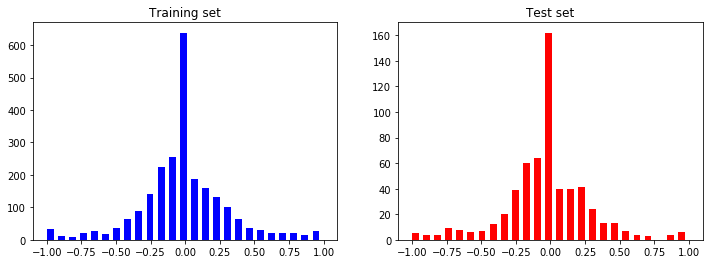

In [0]:
fig, axs = plt.subplots(1,2 , figsize = (12, 4))
axs[0].hist(y_train, bins = num_bins, width = 0.05, color = 'blue')
axs[0].set_title("Training set")
axs[1].hist(y_valid, bins = num_bins, width = 0.05, color = 'red')
axs[1].set_title("Test set")

In [0]:
def zoom(img):
  zoom = iaa.Affine(scale = (1, 1.3)) # affine translations are those which preserver straight lines or planes of the object
  image = zoom.augment_image(img)
  return image

Text(0.5, 1.0, 'Zoomed image')

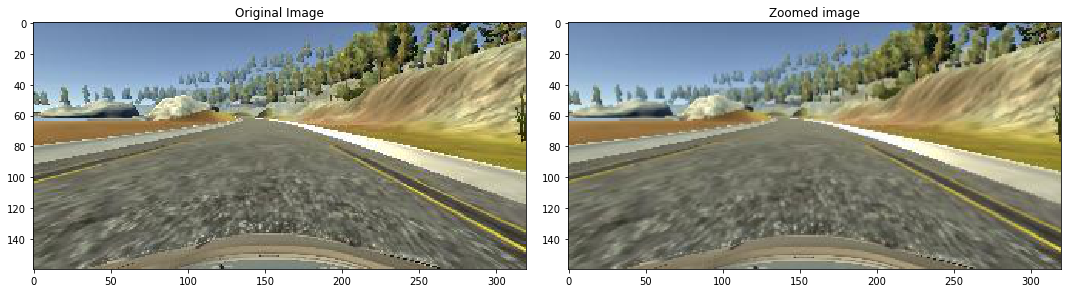

In [0]:
image = image_paths[random.randint(0, 1000)]
original_image = mpimg.imread(image)
zoomed_image = zoom(original_image)
fig, axs = plt.subplots(1, 2, figsize = (15, 10))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title("Original Image")
axs[1].imshow(zoomed_image)
axs[1].set_title("Zoomed image")

In [0]:
def pan(img):
  pan = iaa.Affine(translate_percent = {"x": (-0.1, 0.1), "y": (-0.1, 0.1)}) # 10% horizontal and vertical translations
  img = pan.augment_image(img)
  return img

Text(0.5, 1.0, 'Panned image')

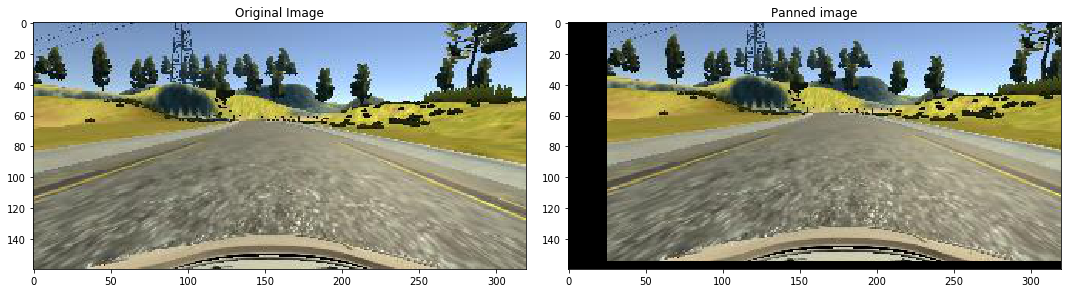

In [0]:
image = image_paths[random.randint(0, 1000)]
original_image = mpimg.imread(image)
panned_image = pan(original_image)
fig, axs = plt.subplots(1, 2, figsize = (15, 10))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title("Original Image")
axs[1].imshow(panned_image)
axs[1].set_title("Panned image")

In [0]:
def img_random_brightness(img):
    brightness = iaa.Multiply((0.2, 1.2)) # multiples all pixes given in the specified range. If values is less than 1, image becomes darker else brighter
    image = brightness.augment_image(img)
    return image

Text(0.5, 1.0, 'brightness_altered_image')

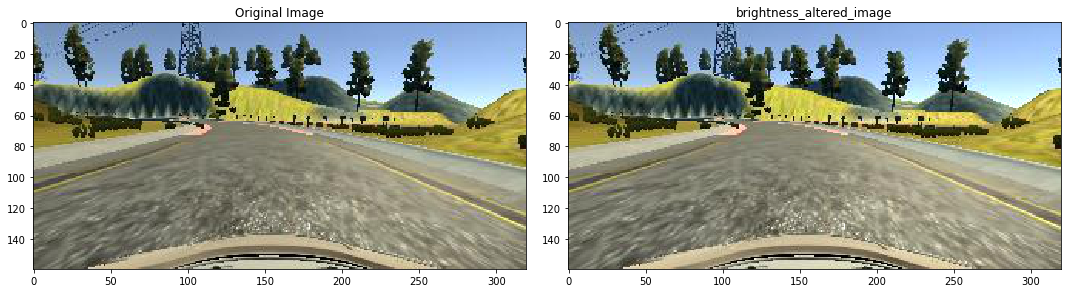

In [0]:
image = image_paths[random.randint(0, 1000)]
original_image = mpimg.imread(image)
brightness_altered_image = img_random_brightness(original_image)
fig, axs = plt.subplots(1, 2, figsize = (15, 10))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title("Original Image")
axs[1].imshow(brightness_altered_image)
axs[1].set_title("brightness_altered_image")

In [0]:
def img_random_flip(img, steering_angle):
  image = cv2.flip(img, 1) # 0 is vertical flip, 1 is horizontal file , -1 is both flip combined
  steering_angle = -steering_angle
  return image, steering_angle

Text(0.5, 1.0, 'flipped_image - Steering Angle -0.0')

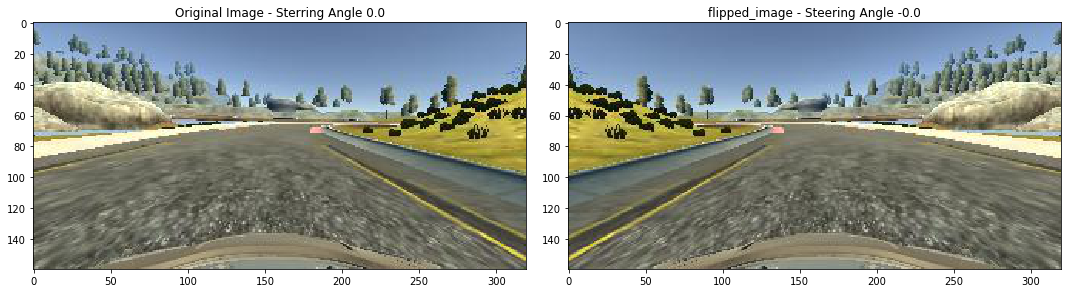

In [0]:
random_index = random.randint(0, 1000)
image = image_paths[random_index]
steer = steering[random_index]
original_image = mpimg.imread(image)
flipped_image, nsteer = img_random_flip(original_image, steer)
fig, axs = plt.subplots(1, 2, figsize = (15, 10))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title("Original Image - Sterring Angle {}".format(steer))
axs[1].imshow(flipped_image)
axs[1].set_title("flipped_image - Steering Angle {}".format(nsteer))

In [0]:
def random_augment(image, steering_angle):
  image = mpimg.imread(image)
  if np.random.rand()<0.5: # applying each augmentation with 50% probability
    image = pan(image)
  if np.random.rand()<0.5:
    image = zoom(image)
  if np.random.rand()<0.5:
    image = img_random_brightness(image)
  if np.random.rand()<0.5:
    image, steering_angle = img_random_flip(image, steering_angle)
  return image, steering_angle
    

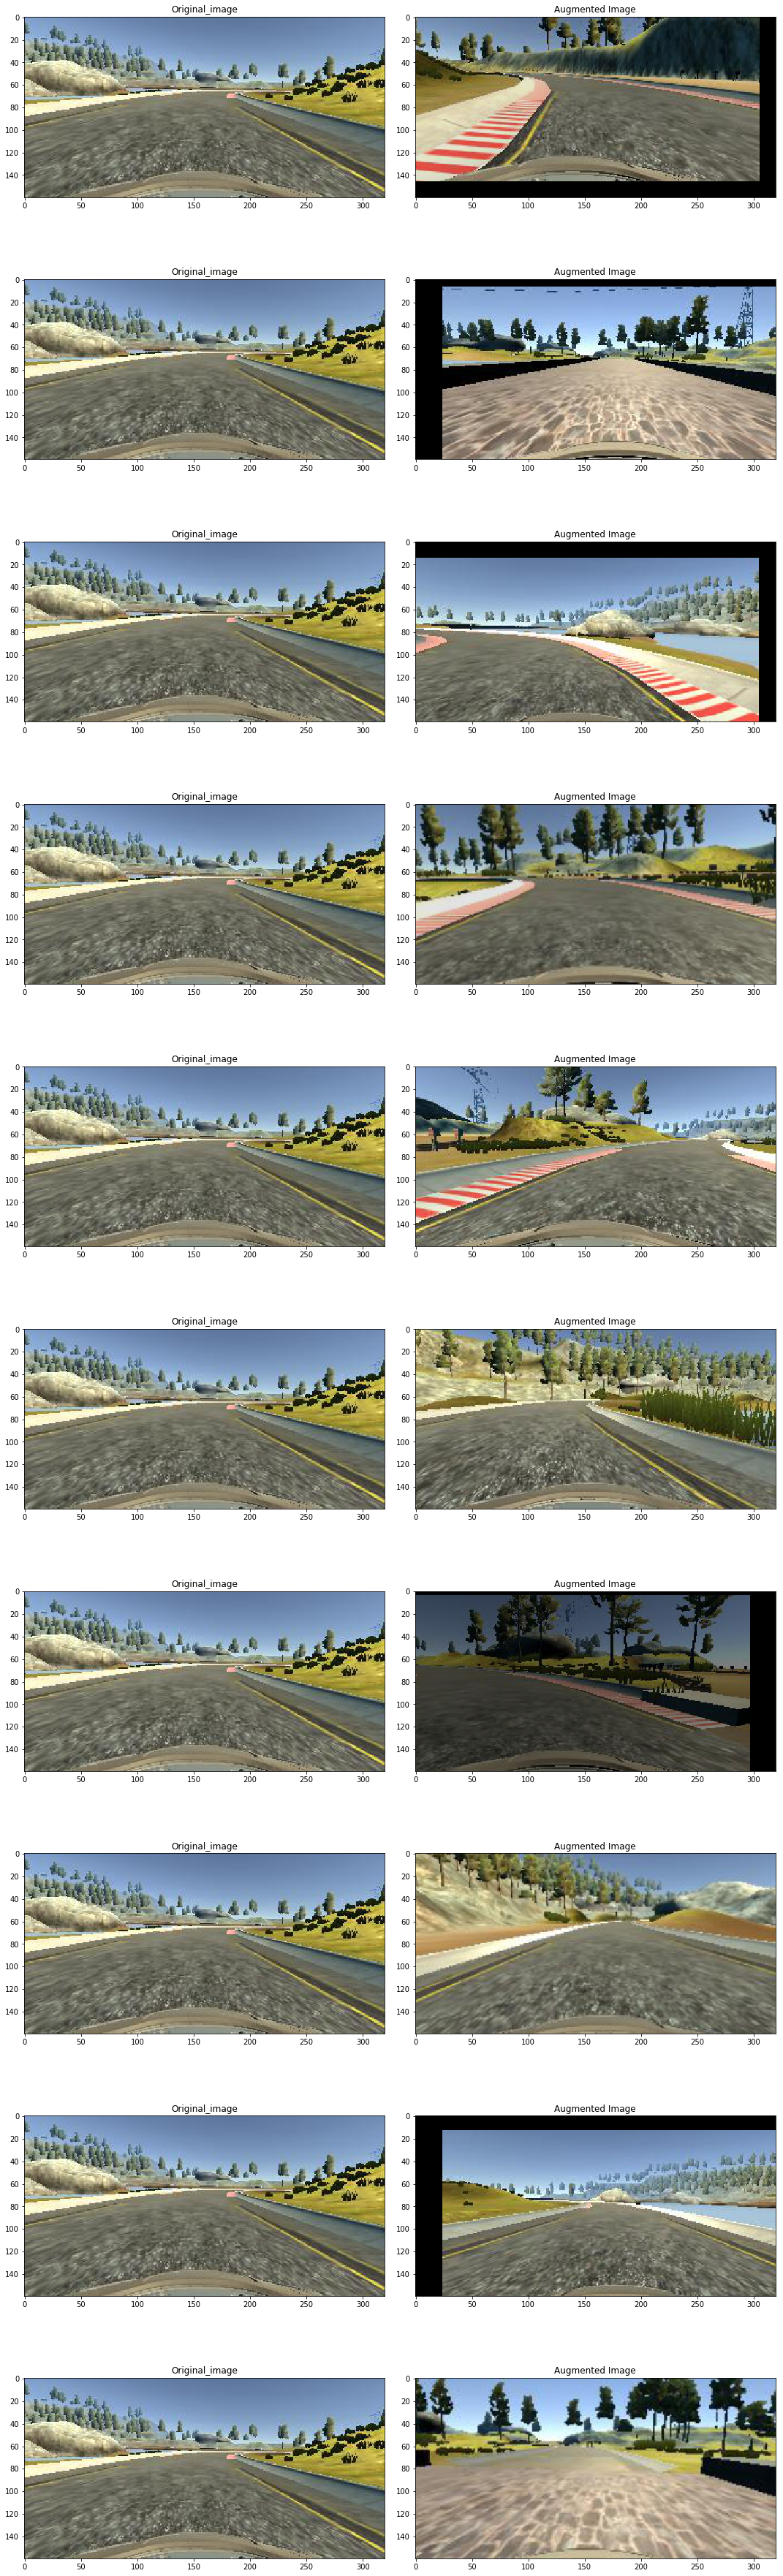

In [0]:
n_rows, n_cols = 10, 2
fig, axs = plt.subplots(n_rows, n_cols, figsize = (15, 50))
fig.tight_layout()
for i in range(10):
  randnum = random.randint(0, len(image_paths)-1)
  random_image = image_paths[randnum]
  steer = steering[randnum]
  
  original_image = mpimg.imread(image, steer)
  augment_image, steer = random_augment(random_image, steer)
  
  axs[i][0].imshow(original_image)
  axs[i][0].set_title("Original_image")
  
  axs[i][1].imshow(augment_image)
  axs[i][1].set_title("Augmented Image")

In [0]:
def img_preprocess(img):
    img = img[60:135, :, :] # removing the top and the hood of the car   
    img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV) # This color space is very useful to train the NVIDIA model as recommmended by the experts
    img = cv2.GaussianBlur(img, (3,3), 0)
    img = cv2.resize(img, (200, 66)) # This size matches with the input size used by the NVIDIA model.
    img = img/255
    return img

In [0]:
# image = image_paths[100]
# original_image = mpimg.imread(image)
# preprocessed_image = img_preprocess(image)
# fig, axs = plt.subplots(1, 2, figsize = (15,10))
# fig.tight_layout()
# axs[0].imshow(original_image)
# axs[0].set_title("Original Image")
# axs[1].imshow(preprocessed_image)
# axs[1].set_title("Preprocessed Image")
# plt.show()

In [0]:
def batch_generator(image_paths, steering_ang, batch_size, istraining):
  while True:
    batch_img, batch_steering = [], []
    for i in range(batch_size):
      random_index = random.randint(0, len(image_paths)-1)
      
      if istraining:
        im, steer = random_augment(image_paths[random_index], steering_ang[random_index])
      else:
        im = mpimg.imread(image_paths[random_index])
        steer = steering_ang[random_index]
      
      im = img_preprocess(im)
      batch_img.append(im)
      batch_steering.append(steer)
    yield (np.asarray(batch_img), np.asarray(batch_steering))

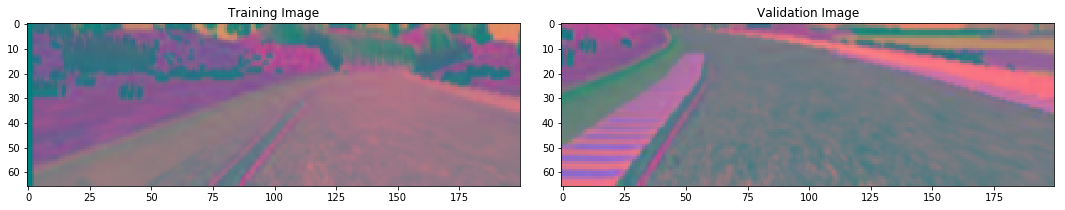

In [0]:
X_train_gen, y_train_gen = next(batch_generator(image_paths, steering, 1, 1))
X_valid_gen, y_valid_gen = next(batch_generator(image_paths, steering, 1, 0))
fig, axs = plt.subplots(1, 2, figsize = (15,10))
fig.tight_layout()
axs[0].imshow(X_train_gen[0])
axs[0].set_title("Training Image")
axs[1].imshow(X_valid_gen[0])
axs[1].set_title("Validation Image")
plt.show()

In [0]:
# X_train, X_valid = np.array(list(map(img_preprocess, X_train))), np.array(list(map(img_preprocess, X_valid)))

In [0]:
# plt.imshow(X_train[random.randint(0, len(X_train)-1)])
# plt.axis('off')
# print(X_train.shape)

In [0]:
def nvidia_model():
  model = Sequential()
  model.add(Convolution2D(24, 5, 5, subsample = (2, 2), input_shape = (66, 200, 3), activation = 'relu')) # 5, 5 is filter size, subsapme = (2, 2) means stride of 2 in hori and verti directions
  model.add(Convolution2D(36, 5, 5, subsample = (2, 2) ,activation = 'elu')) # in relu, negative values return 0, so gradient are changed during backprop, and so weights aren't updated and loss doesn't decrese. Elu is like relu but it gives negative values for negative input
  model.add(Convolution2D(48, 5, 5, subsample = (2, 2) ,activation = 'elu'))
  model.add(Convolution2D(64, 3, 3, activation = 'elu'))
  model.add(Convolution2D(64, 3, 3 ,activation = 'elu'))
#   model.add(Dropout(0.5))
  
  model.add(Flatten())
  
  model.add(Dense(100, activation = 'elu'))   
#   model.add(Dropout(0.5))
  
  model.add(Dense(50, activation = 'elu'))   
#   model.add(Dropout(0.5))

  model.add(Dense(10, activation = 'elu'))   
#   model.add(Dropout(0.5))

  model.add(Dense(1))
  
  optimizer = Adam(lr = 1e-3)
  model.compile(loss='mse', optimizer = optimizer)
  return model 

  

In [0]:
model = nvidia_model()
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 31, 98, 24)        1824      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 47, 36)        21636     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 5, 22, 48)         43248     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 3, 20, 64)         27712     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 1, 18, 64)         36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 100)               115300    
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (5, 5), input_shape=(66, 200, ..., activation="relu", strides=(2, 2))`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(36, (5, 5), activation="elu", strides=(2, 2))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (5, 5), activation="elu", strides=(2, 2))`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="elu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), ac

In [0]:
 history = model.fit_generator(batch_generator(X_train, y_train, 100, 1), steps_per_epoch = 300, epochs = 10, validation_data = batch_generator(X_valid, y_valid, 100, 0),
                              validation_steps = 200, verbose = 1, shuffle = 1)

Epoch 1/10
300/300 [==============================] - 159s 529ms/step - loss: 0.0870 - val_loss: 0.0548
Epoch 2/10
300/300 [==============================] - 155s 518ms/step - loss: 0.0653 - val_loss: 0.0489
Epoch 3/10
300/300 [==============================] - 155s 515ms/step - loss: 0.0621 - val_loss: 0.0503
Epoch 4/10
300/300 [==============================] - 154s 514ms/step - loss: 0.0602 - val_loss: 0.0495
Epoch 5/10
300/300 [==============================] - 154s 512ms/step - loss: 0.0582 - val_loss: 0.0544
Epoch 6/10
300/300 [==============================] - 152s 507ms/step - loss: 0.0583 - val_loss: 0.0494
Epoch 7/10
300/300 [==============================] - 151s 504ms/step - loss: 0.0576 - val_loss: 0.0510
Epoch 8/10
300/300 [==============================] - 150s 499ms/step - loss: 0.0567 - val_loss: 0.0513
Epoch 9/10
300/300 [==============================] - 152s 506ms/step - loss: 0.0567 - val_loss: 0.0443
Epoch 10/10
300/300 [==============================] - 153s 510m

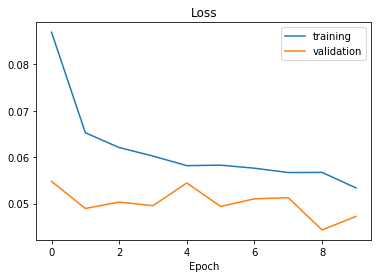

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.xlabel('Epoch')
plt.title('Loss')
plt.show()


In [0]:
model.save("model.h5")

In [0]:
from google.colab import files
files.download("model.h5")